# Final Project

In [1]:
pip install seaborn

     |████████████████████████████████| 283 kB 4.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import sqlite3
import csv

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
pip install pandas plotnine

     |████████████████████████████████| 4.4 MB 4.0 MB/s eta 0:00:01
     |████████████████████████████████| 231 kB 40.7 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 1.7 MB/s  eta 0:00:01
     |████████████████████████████████| 9.5 MB 13.4 MB/s eta 0:00:01
     |████████████████████████████████| 111 kB 47.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
from plotnine import *

## 1. Dataset features

In [6]:
##Data will be loaded in csv format 
additive = pd.read_csv('Additive_data.csv')

This project will be based on data on the Chuvash additive particle. Unlike the dataset used in Homework 2, this dataset is much larger (all occurrences of thr additive particle in our corpus are considered) and includes a different set of columns. In total, the dataset, as you can see, includes 227 examples.

In [7]:
print(additive.shape) 

(227, 6)


The dataset contains the following information about the additive particle: ID of example, meaning of the particle in this example, after which part of speech the particle is placed, additional information about the part of speech (like tense of a verb), the position of the particle in the sentence and example in Chuvash.

In [8]:
additive.head()

,ID,Meanings,PartOfSpeech,Addition,EndOfClause,Example
0,201__An.104.1,Additive,Noun,NaN,Yes,karʲan ʦelinaja da gajzaj
1,201__An.110.1,Connector,Verb,PST,No,karʲən mana sundɨrʲdan korʨëɕ ta vërenmezërek ...
2,201__An.115.1,Indef,Pronoun,Neg,No,"выход дней dan, a nim de ɕok"
3,201__An.125.1,Indef,Pronoun,Neg,No,"saldaga gajmanʲəzam vəzam nimde mar, xəramala ..."
4,201__An.129.1,Additive,Noun,NaN,No,on ʨonʲa janfarʲ fevralʲda mënle tëttëm


As you can see from the table below, the data type of all variables is object. It should also be noted that the column "Addition" contains less data than the others. This is due to the fact that the addition is not filled in for every example, but only for some parts of speech (for example, there is no additional information for nouns).

In [9]:
additive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            227 non-null    object
 1   Meanings      227 non-null    object
 2   PartOfSpeech  227 non-null    object
 3   Addition      160 non-null    object
 4   EndOfClause   226 non-null    object
 5   Example       227 non-null    object
dtypes: object(6)
memory usage: 10.8+ KB


From the table below, you can see that the dataset includes several identical sentences (uniq in ID and Example columns), in which the additive particle is used more than once. Column Meanings, Part of Speech and Addition contain 8, 11 and 21 unique values, which is quite a large number for analysis.The EndOfClause column contains only two unique values.

In [10]:
additive.describe()

,ID,Meanings,PartOfSpeech,Addition,EndOfClause,Example
count,227,227,227,160,226,227
unique,202,8,11,21,2,206
top,201__An.25.1,Connector,Verb,PST,No,porfilʲ porfilʲ de porfirʲ de orine
freq,3,103,126,64,198,4


## 2. Exploratory data analysis

### 2.1. Meanings

In an extended dataset, the most common functions are Connector and Coordination. The additive function, which is seen as the central function for this particle, has fewer examples.

Text(0, 0.5, 'Counts')

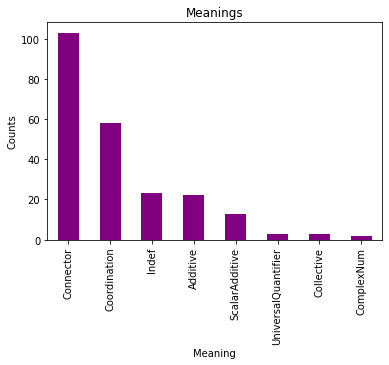

In [11]:
additive['Meanings'].value_counts().plot.bar(color='purple'); 
plt.title('Meanings')
plt.xlabel('Meaning')
plt.ylabel('Counts')

### 2.2. PartOfSpeech

As you can see from the graph, most often the particle is located behind the verb. There are half as many examples of nouns and pronouns.

Text(0, 0.5, 'Counts')

/srv/conda/envs/notebook/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
/srv/conda/envs/notebook/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.


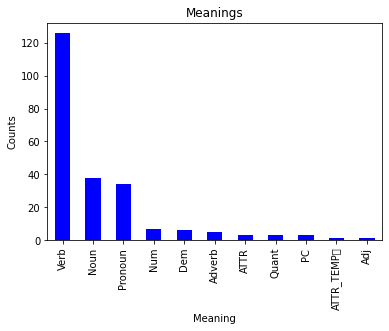

In [12]:
additive['PartOfSpeech'].value_counts().plot.bar(color='blue'); 
plt.title('Meanings')
plt.xlabel('Meaning')
plt.ylabel('Counts')

For the next graph, rows with empty values will be excluded from the table, since the distribution of additional characteristics will be considered.

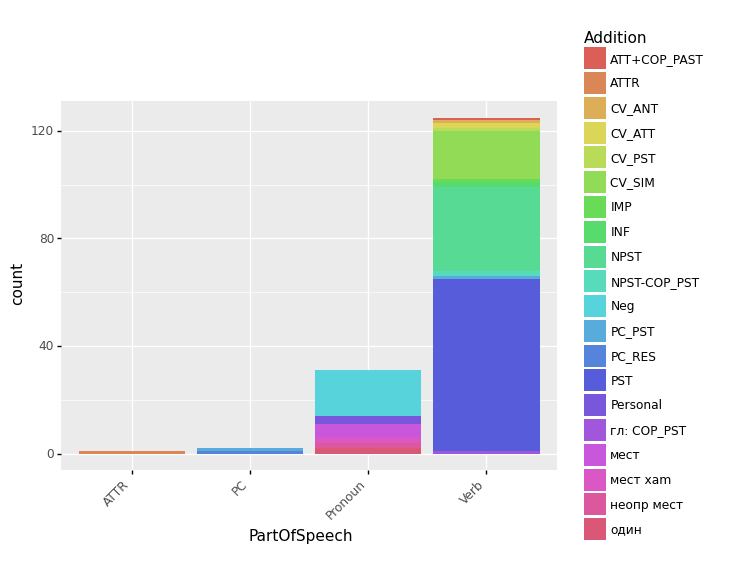

<ggplot: (8747338759663)>

In [13]:
additive1 = additive.dropna()
g = (ggplot(additive1, aes(x='PartOfSpeech', fill = 'Addition')) 
+  geom_bar(stat = 'count'))
p = theme(axis_text_x = element_text(angle = 45, hjust = 1))
g+p

Let's pay attention to the verb, namely to the distribution of the past and non-past tense. You can see that there are more examples with a verb in the past tense, but not significantly.

### 2.3 End Of Clause

Let's create a pie graph showing the ratio of the particle usage at the end of the clause and in other positions.

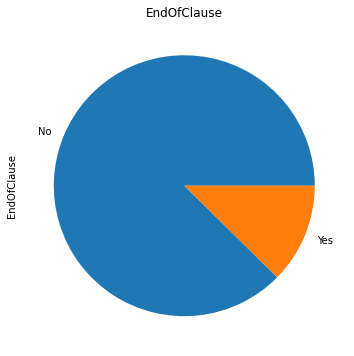

In [14]:
plt.figure(figsize=(6, 6))
additive['EndOfClause'].value_counts().plot(kind='pie');
plt.title('EndOfClause');

This graph shows that the particle is rare at the end of a sentence.

### 2.4. Comparison of different parameters

In this section I will try to compare the interaction of different parameters with each other.

First of all, consider what meanings are more common after what parts of speech.

/srv/conda/envs/notebook/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
/srv/conda/envs/notebook/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.


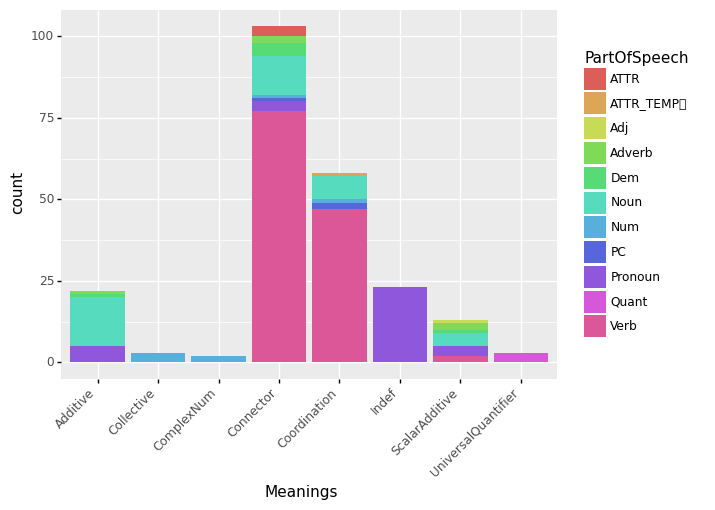

<ggplot: (8747338762006)>

In [15]:
g = (ggplot(additive, aes(x='Meanings', fill = 'PartOfSpeech')) 
+  geom_bar(stat = 'count'))
p = theme(axis_text_x = element_text(angle = 45, hjust = 1))
g+p

It was noted above that the position of the particle after the verb is the most frequent.This graph shows that despite the frequency of the verb, the particle after the verb occurs only in two functions -- Connector and Coordination. It is curious that these two functions were also highlighted as the most frequently encountered in the sample.
In the future, it would be interesting to compare additive and scalar additive, since the first function is mainly used with nouns, and the distribution of the second function is much wider (there is too little data at the moment to draw conclusions).

The following graph shows that the Connector function has the widest compatibility with different parts of speech.

/srv/conda/envs/notebook/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.


/srv/conda/envs/notebook/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.


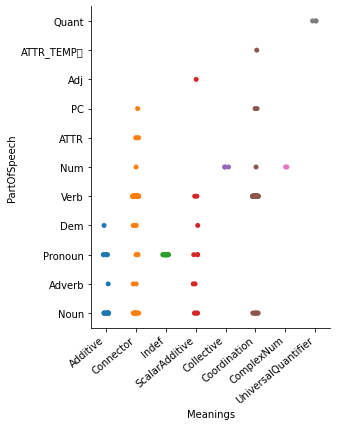

In [16]:
ax = sns.catplot(x="Meanings", y="PartOfSpeech", data=additive)

ax.set_xticklabels(rotation=40, ha="right")

Further I will take a closer look at the position in the clause.

The bar chart below shows that when a particle is used at the end of a sentence, it almost always follows the verb.

/srv/conda/envs/notebook/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
/srv/conda/envs/notebook/lib/python3.6/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.


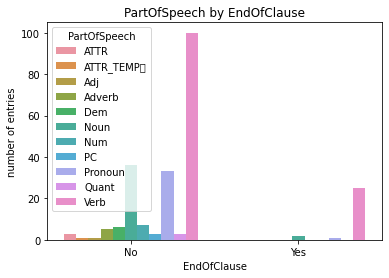

In [17]:
df2 = additive[
    (additive['PartOfSpeech'] != '')
][
    ['EndOfClause', 'Meanings', 'PartOfSpeech']
].groupby(['EndOfClause', 'PartOfSpeech'], as_index=False).count()

df2.columns = ['EndOfClause', 'PartOfSpeech', 'total']
sns.barplot(x="EndOfClause", y="total", hue='PartOfSpeech', data=df2)
plt.title('PartOfSpeech by EndOfClause')
plt.xlabel('EndOfClause')
plt.ylabel('number of entries');

Let's see if the tenses of the verb differ in different positions of the clause.

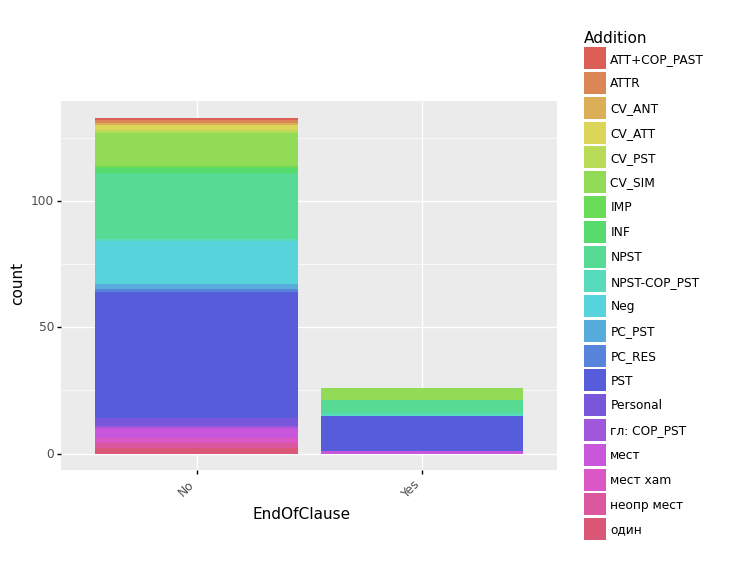

<ggplot: (-9223363281808045992)>

In [81]:
additive1 = additive.dropna()
g = (ggplot(additive1, aes(x='EndOfClause', fill = 'Addition')) 
+  geom_bar(stat = 'count'))
p = theme(axis_text_x = element_text(angle = 45, hjust = 1))
g+p

The graph shows that there is no significant difference in the tenses of the verb, so this will not be considered a significant parameter.

Finally, let's look at the functions that appear at the end of the clause.

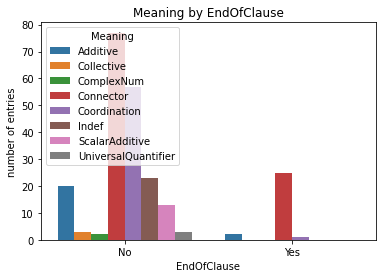

In [88]:
df2 = additive[
    (additive['Meanings'] != '')
][
    ['EndOfClause', 'Meanings', 'PartOfSpeech']
].groupby(['EndOfClause', 'Meanings'], as_index=False).count()

df2.columns = ['EndOfClause', 'Meaning', 'total']
sns.barplot(x="EndOfClause", y="total", hue='Meaning', data=df2)
plt.title('Meaning by EndOfClause')
plt.xlabel('EndOfClause')
plt.ylabel('number of entries');

The graph shows that at the end of the sentence, only the Connector function is used. However, the same function can occur in a different position. This allows us to conclude that the Connector function, unlike other functions, can be in both positions.

## 3. Statistics: Chi-squared test

In the graphs above, two patterns were visible: first, that at the end of the clause, only verb can be used, and secondly, that only Connector function is used at the end of the clause.

In this section, I will apply  two statistical tests to check if the difference in the use of parts of speech and functions in different positions in a sentence is statistically significant.

I will use Chi-squared test and consider parts of speech and functions independently.

### 3.1. Part Of speech and End Of Clause

In [20]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(additive.EndOfClause, additive.PartOfSpeech))

(15.345356483901375,
 0.11996887925012864,
 10,
 array([[  2.62831858,   0.87610619,   0.87610619,   4.38053097,
           5.25663717,  33.2920354 ,   6.13274336,   2.62831858,
          29.78761062,   2.62831858, 109.51327434],
        [  0.37168142,   0.12389381,   0.12389381,   0.61946903,
           0.74336283,   4.7079646 ,   0.86725664,   0.37168142,
           4.21238938,   0.37168142,  15.48672566]]))

P-value here is 0.11996887925012864 (>0,01), therefore, this difference is not statistically significant.Thus, it is necessary to accept the null hypothesis, namely that the position in the clause and the part of speech do not depend on each other. 

### 3.2. Meanings and End Of Clause

In [19]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(additive.EndOfClause, additive.Meanings))

(26.325550580575474,
 0.00044045956993216784,
 7,
 array([[19.27433628,  2.62831858,  1.75221239, 89.36283186, 50.81415929,
         20.15044248, 11.38938053,  2.62831858],
        [ 2.72566372,  0.37168142,  0.24778761, 12.63716814,  7.18584071,
          2.84955752,  1.61061947,  0.37168142]]))

P-value here is  0.00044045956993216784 (<0,01), therefore, this difference is statistically significant. In this case, an alternative hypothesis is accepted, namely, that the position of the particle in the clause and its values depend on each other. At the end of the clause, the particle can function only as Connector.